<a href="https://colab.research.google.com/github/saniya1027108/Brain-Tumor-Detection/blob/main/BrainTumorDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Mounting the dataset from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importing the required libraries 


In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/PROJECTS/BRAIN TUMOR DETECTION'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
%matplotlib inline

In [ ]:
image_directory='/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/dataset'

Checking for the folders and files in our whole dataset

In [ ]:
!ls '/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/Br35H-Mask-RCNN'

 annotations_all.json  'archive (3).zip'   TEST   TRAIN   VAL


In [ ]:
import os 

# Walkthrough chest xray directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/dataset/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")

There are 2 directories and 0 images in '/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/dataset/'. 
There are 0 directories and 1500 images in '/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/dataset/no'. 
There are 0 directories and 1510 images in '/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/dataset/yes'. 


Analysing our data

In [ ]:
no_tumor_images=os.listdir(image_directory + '/no')
yes_tumor_images=os.listdir(image_directory + '/yes')


In [ ]:
import pathlib
image_directory = pathlib.Path("/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/dataset")
class_names = np.array(sorted([item.name for item in image_directory.glob("*")]))
print(class_names)

['no' 'yes']


Tumor Image Shape:  (336, 264, 3)
Healthy image shape:  (194, 259, 3)


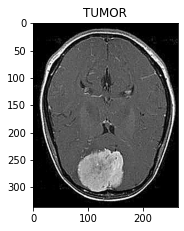

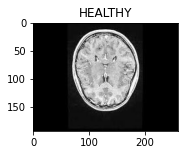

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

yes_image = cv2.imread('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/dataset/yes/y1000.jpg')
plt.figure(figsize=(15,6))
plt.subplot(151)
plt.title("TUMOR")
plt.imshow(yes_image)
print('Tumor Image Shape: ', yes_image.shape)

no_image = cv2.imread('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/dataset/no/no1000.jpg')
plt.figure(figsize=(15,6))
plt.subplot(151)
plt.title("HEALTHY")
plt.imshow(no_image)
print('Healthy image shape: ', no_image.shape)



The pred folder in our dataset is required for later computataion when we check the working for our model(end)

In [ ]:
pred_image = Path('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred')
pred_jpg_path = list(pred_image.glob(r"*.jpg"))
print(pred_jpg_path)


[PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred0.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred13.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred25.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred57.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred44.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred55.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred43.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred46.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred4.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred7.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred39.jpg'), PosixPath('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/pred/pred3.jp

In [ ]:
pred_jpg_labels = list(map(lambda x : os.path.split(os.path.split(x)[0])[1],pred_jpg_path))
print(pred_jpg_labels[0:5])

['pred', 'pred', 'pred', 'pred', 'pred']


In [ ]:
pred_jpg_path=pd.Series(pred_jpg_path, name= "JPG").astype(str)
pred_jpg_label = pd.Series(pred_jpg_labels, name="TUMOR_CATEGORY")

TENSORFLOW

In [ ]:
import tensorflow as tf
print(tf.constant(yes_image))
print("\n")
print(tf.constant(no_image))

tf.Tensor(
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], shape=(336, 264, 3), dtype=uint8)


tf.Tensor(
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], shape=(194, 259, 3), dtype=uint8)


In [ ]:
yes_image = yes_image/255
no_image = no_image/255

print(yes_image)
print(no_image)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  .

**DATA PREPROCESSING** 

Dividing our data into train,test and validation respectively

In [ ]:
#Dividing our data into Train/Test/Val
from pathlib import Path
train_directory = pathlib.Path('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/Br35H-Mask-RCNN/TRAIN')
test_directory = pathlib.Path('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/Br35H-Mask-RCNN/TEST')
val_directory = pathlib.Path('/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/Br35H-Mask-RCNN/VAL')

In [ ]:
train_directory = pathlib.Path("/content/drive/MyDrive/PROJECTS/Brain Tumor Detection/Br35H-Mask-RCNN/TRAIN")
class_names = np.array(sorted([item.name for item in train_directory.glob("*")]))

print(class_names)

['no' 'yes']


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    validation_split=None,
    seed=123,
    image_size=(180,180),
    )

Found 2100 files belonging to 2 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory,
    validation_split=None,
    seed=123,
    image_size=(180,180),
    )

Found 900 files belonging to 2 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_directory,
    validation_split=None,
    seed=123,
    image_size=(180,180),
    )

Found 253 files belonging to 2 classes.


NORMALIZATION

In [ ]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)


normalized_train = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train))
print(image_batch, labels_batch)


tf.Tensor(
[[[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   ...
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]]

  [[0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   ...
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]]

  [[0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   ...
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]]

  ...

  [[0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00]
   [0.0000000e+

In [ ]:
normalized_test = test_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train))
print(image_batch, labels_batch)

tf.Tensor(
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.      

In [ ]:
normalized_val = val_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train))
print(image_batch, labels_batch)

tf.Tensor(
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.      

**BUILDING OUR MODEL**

In [ ]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(255, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

hist = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
66/66 [==============================] - 353s 5s/step - loss: 0.4992 - accuracy: 0.7729 - val_loss: 0.3695 - val_accuracy: 0.8498
Epoch 2/10
66/66 [==============================] - 8s 109ms/step - loss: 0.2638 - accuracy: 0.8924 - val_loss: 0.3859 - val_accuracy: 0.7984
Epoch 3/10
66/66 [==============================] - 8s 108ms/step - loss: 0.1703 - accuracy: 0.9314 - val_loss: 0.2183 - val_accuracy: 0.9170
Epoch 4/10
66/66 [==============================] - 8s 109ms/step - loss: 0.0933 - accuracy: 0.9681 - val_loss: 0.1043 - val_accuracy: 0.9644
Epoch 5/10
66/66 [==============================] - 8s 110ms/step - loss: 0.0458 - accuracy: 0.9881 - val_loss: 0.1058 - val_accuracy: 0.9723
Epoch 6/10
66/66 [==============================] - 8s 109ms/step - loss: 0.0286 - accuracy: 0.9919 - val_loss: 0.1004 - val_accuracy: 0.9684
Epoch 7/10
66/66 [==============================] - 8s 106ms/step - loss: 0.0472 - accuracy: 0.9833 - val_loss: 0.0955 - val_accuracy: 0.9644
Epoch 8

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

Plotting the loss and the accuracy curves for training and validation set

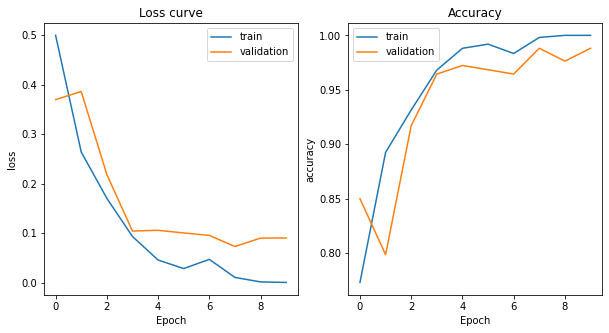

In [ ]:
#get the training and validation accuracy
train_acc = hist.history['accuracy']
valid_acc = hist.history['val_accuracy']

#get the loss
train_loss = hist.history['loss']
valid_loss = hist.history['val_loss']

#get the entries
xvalues = np.arange(len(train_acc))

#visualise
f, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(xvalues, train_loss)
ax[0].plot(xvalues, valid_loss)
ax[0].set_title("Loss curve")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("loss")
ax[0].legend(['train', 'validation'])

ax[1].plot(xvalues, train_acc)
ax[1].plot(xvalues, valid_acc)
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("accuracy")
ax[1].legend(['train', 'validation'])

plt.show()

In [ ]:
valid_loss, valid_acc = model.evaluate_generator(val_ds)
print("final validation accuracy: ", valid_acc*100)


final validation accuracy:  98.81423115730286


MODEL PERFORMANCE

In [ ]:
model_test_prediction = model.predict(test_ds)

In [ ]:
model_test_prediction = model_test_prediction.argmax(axis = -1)

In [ ]:
print(model_test_prediction)

[1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1
 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0
 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1
 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0
 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1
 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0
 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1
 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1
 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1
 0 1 0 1 0 0 0 0 1 0 0 0 

In [ ]:
last_prediction = []
[last_prediction.append('NO') if i==1 else last_prediction.append('TUMOR')for i in model_test_prediction]
print(last_prediction)


['NO', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 

In [ ]:
main_data_prediction = pd.DataFrame({"JPG":pred_jpg_path})
print(main_data_prediction.head())

                                                 JPG
0  /content/drive/MyDrive/PROJECTS/Brain Tumor De...
1  /content/drive/MyDrive/PROJECTS/Brain Tumor De...
2  /content/drive/MyDrive/PROJECTS/Brain Tumor De...
3  /content/drive/MyDrive/PROJECTS/Brain Tumor De...
4  /content/drive/MyDrive/PROJECTS/Brain Tumor De...


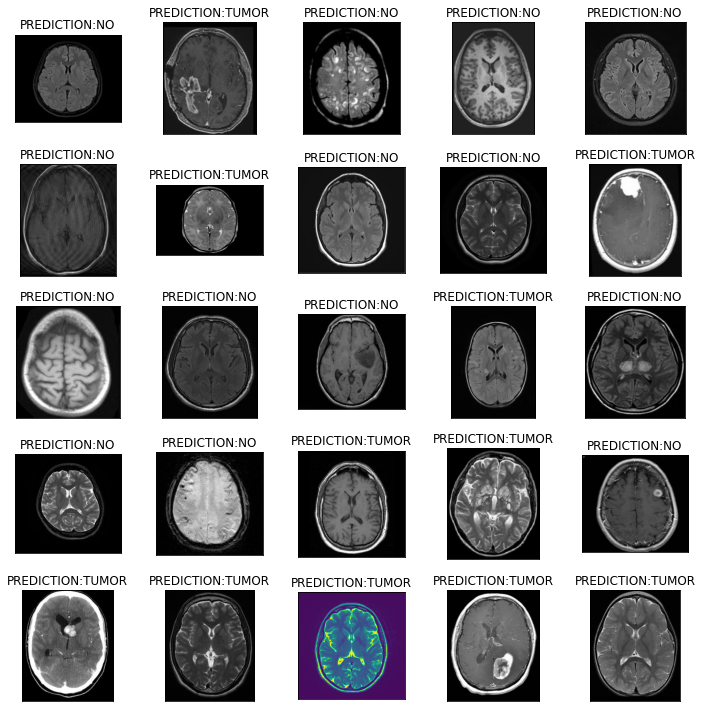

In [ ]:
fig, axes = plt.subplots(nrows = 5,
                         ncols = 5,
                         figsize = (10,10),
                         subplot_kw = {'xticks': [], 'yticks':[]})

for i,ax in enumerate(axes.flat):
  ax.imshow(plt.imread(main_data_prediction["JPG"].loc[i]))
  ax.set_title(f"PREDICTION:{last_prediction[i]}")

plt.tight_layout()
plt.show()